# **Weather AUS Model**


### 1- Import & Display dataset
***

In [40]:
import pandas as pd
pd.set_option('display.max_columns', 200)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.feature_selection import SelectKBest, mutual_info_classif
from imblearn.over_sampling import SMOTE

from pathlib import Path
import os
import math

### 2- Load Data
***

In [41]:
script_folder = Path(os.getcwd())
dataset_folder = script_folder / "data"

print("Code Location: ", script_folder)
print("Dataset Location: ", dataset_folder)

Code Location:  d:\Coding\Jupyter\Weather-AUS
Dataset Location:  d:\Coding\Jupyter\Weather-AUS\data


In [42]:
df = pd.read_csv(dataset_folder / "weatherAUS.csv")
print(f"Original shape: {df.shape}")
df.head()

Original shape: (145460, 23)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [44]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


### 3- Visualization Functions
***

In [45]:
def plot_bar(data, title, xlabel='', ylabel='Count', color='skyblue', figsize=(6,4), kind='bar'):
    plt.figure(figsize=figsize)
    data.plot(kind=kind, color=color)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=0 if kind == 'bar' else None)
    plt.show()

In [46]:
def plot_correlations(df, target_col, top_n=10, ascending=False, threshold=None):
    df_temp = df.copy()
    df_temp[target_col] = df_temp[target_col].map({'Yes': 1, 'No': 0})
    
    corr_data = (
        df_temp.select_dtypes(include=[np.number])
        .corr()[target_col]
        .drop(target_col)
        .dropna()
        .abs()
        .sort_values(ascending=ascending)
        .head(top_n)
    )
    
    if threshold:
        corr_data = corr_data.loc[lambda x: x < threshold]
    
    ax = corr_data.plot(kind='bar', color='seagreen', figsize=(10,5))
    
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2, height, f'{height:.3f}',
                ha='center', va='bottom', fontsize=9)
    
    title = f'Top {top_n} Correlations' if not ascending else f'Least Correlations (<{threshold})'
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel('Feature')
    plt.ylabel('Correlation Coefficient')
    plt.show()

In [47]:
def plot_boxplots(df, n_cols=4):
    numerical_cols = list(df.select_dtypes(include=np.number).columns)
    n_rows = math.ceil(len(numerical_cols) / n_cols)
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))
    axes = axes.flatten()
    
    for idx, col in enumerate(numerical_cols):
        sns.boxplot(x=df[col], ax=axes[idx])
        axes[idx].set_title(f'Boxplot of {col}', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel('')
    
    for idx in range(len(numerical_cols), len(axes)):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()

### 4- Initial EDA
***

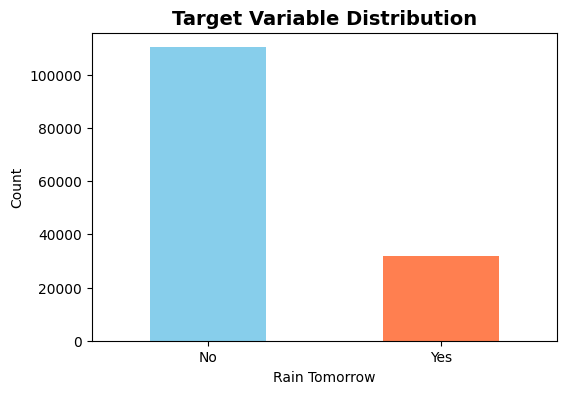

In [48]:
plot_bar(
    data=df['RainTomorrow'].value_counts(), 
    title='Target Variable Distribution',
    xlabel='Rain Tomorrow',
    color=['skyblue', 'coral'] #type:ignore
)

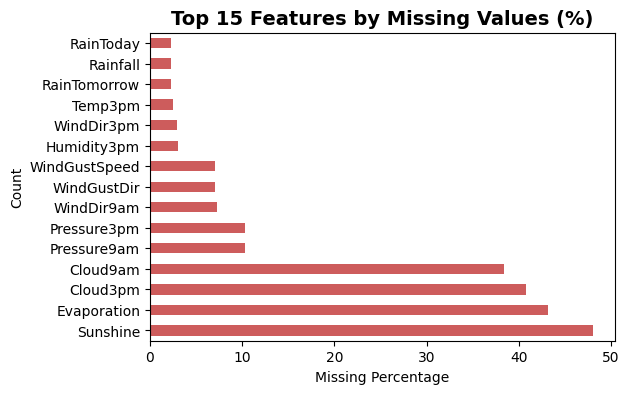

In [49]:
missing_pct = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False).head(15)
plot_bar(
    data=missing_pct, 
    title='Top 15 Features by Missing Values (%)',
    xlabel='Missing Percentage',
    color='indianred',
    kind='barh'
)

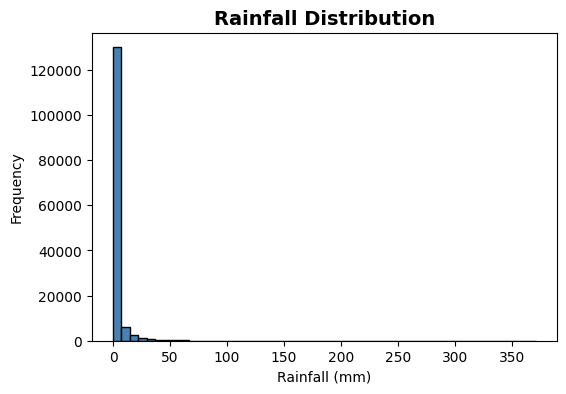

In [50]:
def plot_rainfall_distribution():
    plt.figure(figsize=(6,4))
    df['Rainfall'].plot(
        kind='hist', bins=50, color='steelblue', edgecolor='black'
    )
    plt.title('Rainfall Distribution', fontsize=14, fontweight='bold')
    plt.xlabel('Rainfall (mm)')
    plt.ylabel('Frequency')
    plt.show()
    
plot_rainfall_distribution()

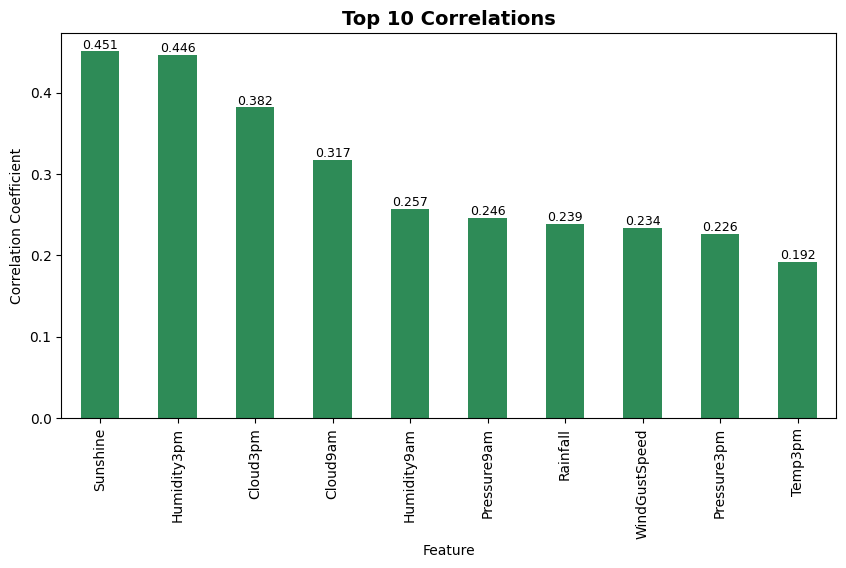

In [51]:
plot_correlations(
    df=df, 
    target_col='RainTomorrow', 
    top_n=10, 
    ascending=False
)

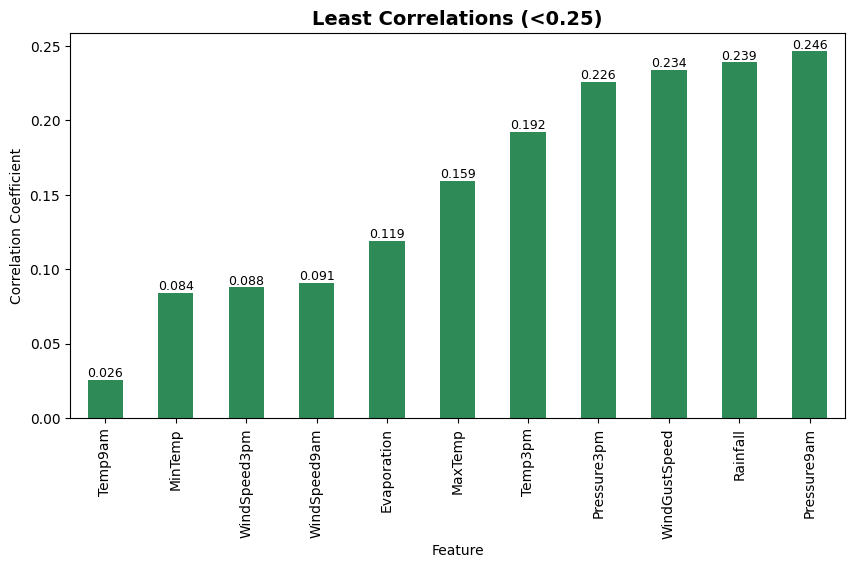

In [52]:
plot_correlations(
    df=df, 
    target_col='RainTomorrow',
    top_n=11,
    ascending=True,
    threshold=0.25
)

### 5- Data Cleaning
***

In [53]:
df.drop_duplicates(inplace=True)

In [54]:
df = df.drop(columns=["Evaporation", "Sunshine"])

target_col = "RainTomorrow"
df = df.dropna(subset=[target_col])

In [55]:
numerical_cols = list(df.select_dtypes(include=np.number).columns)
categorical_cols = list(df.select_dtypes(include='object').columns)
print(numerical_cols)
print(categorical_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


### 6- Feature Engineering
***

In [56]:
print(df.shape)

(142193, 21)


In [57]:
# create Year, Month, Day, DayOfWeek and dropped Date col
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek
df = df.drop(columns=['Date'])

# Create cyclical features for temporal patterns
df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)
df['Day_sin'] = np.sin(2 * np.pi * df['Day'] / 31)
df['Day_cos'] = np.cos(2 * np.pi * df['Day'] / 31)

df = df.drop(columns=['Temp9am', 'Temp3pm']) #TODO: remove or leave?

In [58]:
print(df.shape)

(142193, 26)


In [59]:
numerical_cols = list(df.select_dtypes(include=np.number).columns)
categorical_cols = list(df.select_dtypes(include='object').columns)
print(numerical_cols)
print(categorical_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Year', 'Month', 'Day', 'DayOfWeek', 'Month_sin', 'Month_cos', 'Day_sin', 'Day_cos']
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


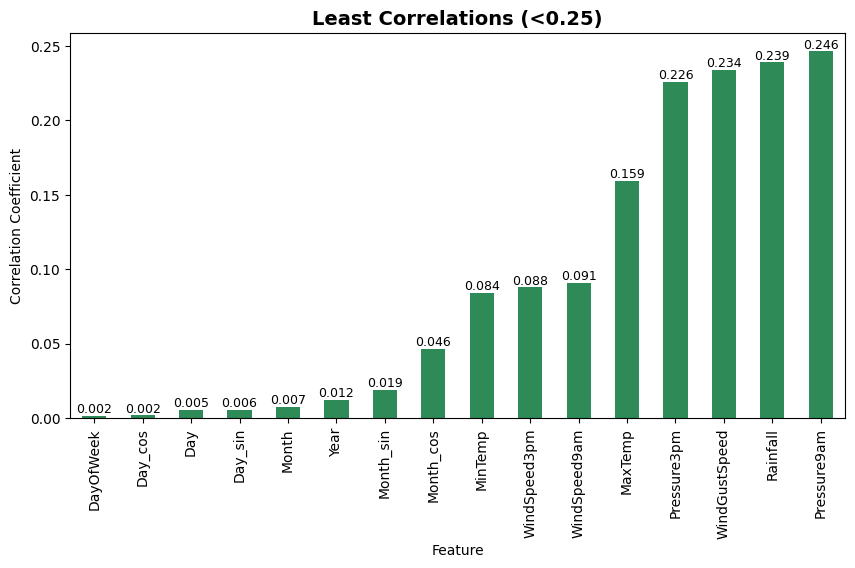

In [60]:
plot_correlations(
    df=df, 
    target_col='RainTomorrow',
    top_n=25,
    ascending=True,
    threshold=0.25
)

### 7- Handle Missing Values
***

In [61]:
numerical_cols = list(df.select_dtypes(include=np.number).columns)
categorical_cols = list(df.select_dtypes(include='object').columns)

date_cols = ['Year', 'Month', 'Day', 'DayOfWeek', 'Month_sin', 'Month_cos', 'Day_sin', 'Day_cos']
numerical_cols_not_date = [col for col in numerical_cols if col not in date_cols]

In [62]:
for col in numerical_cols_not_date:
    max_consecutive_missing = df[col].isna().astype(int).groupby(
        df[col].notna().astype(int).cumsum()
    ).sum().max()
    
    if max_consecutive_missing < 7:
        df[col] = df[col].interpolate(method='nearest', limit_direction='both')
    else:
        monthly_means = df.groupby(['Year', 'Month'])[col].transform('mean')
        df.loc[:, col] = df[col].fillna(monthly_means)

print("Missing values after imputation:")
print(df[numerical_cols_not_date].isnull().sum())

Missing values after imputation:
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
dtype: int64


### 8- Handling Outliers
***

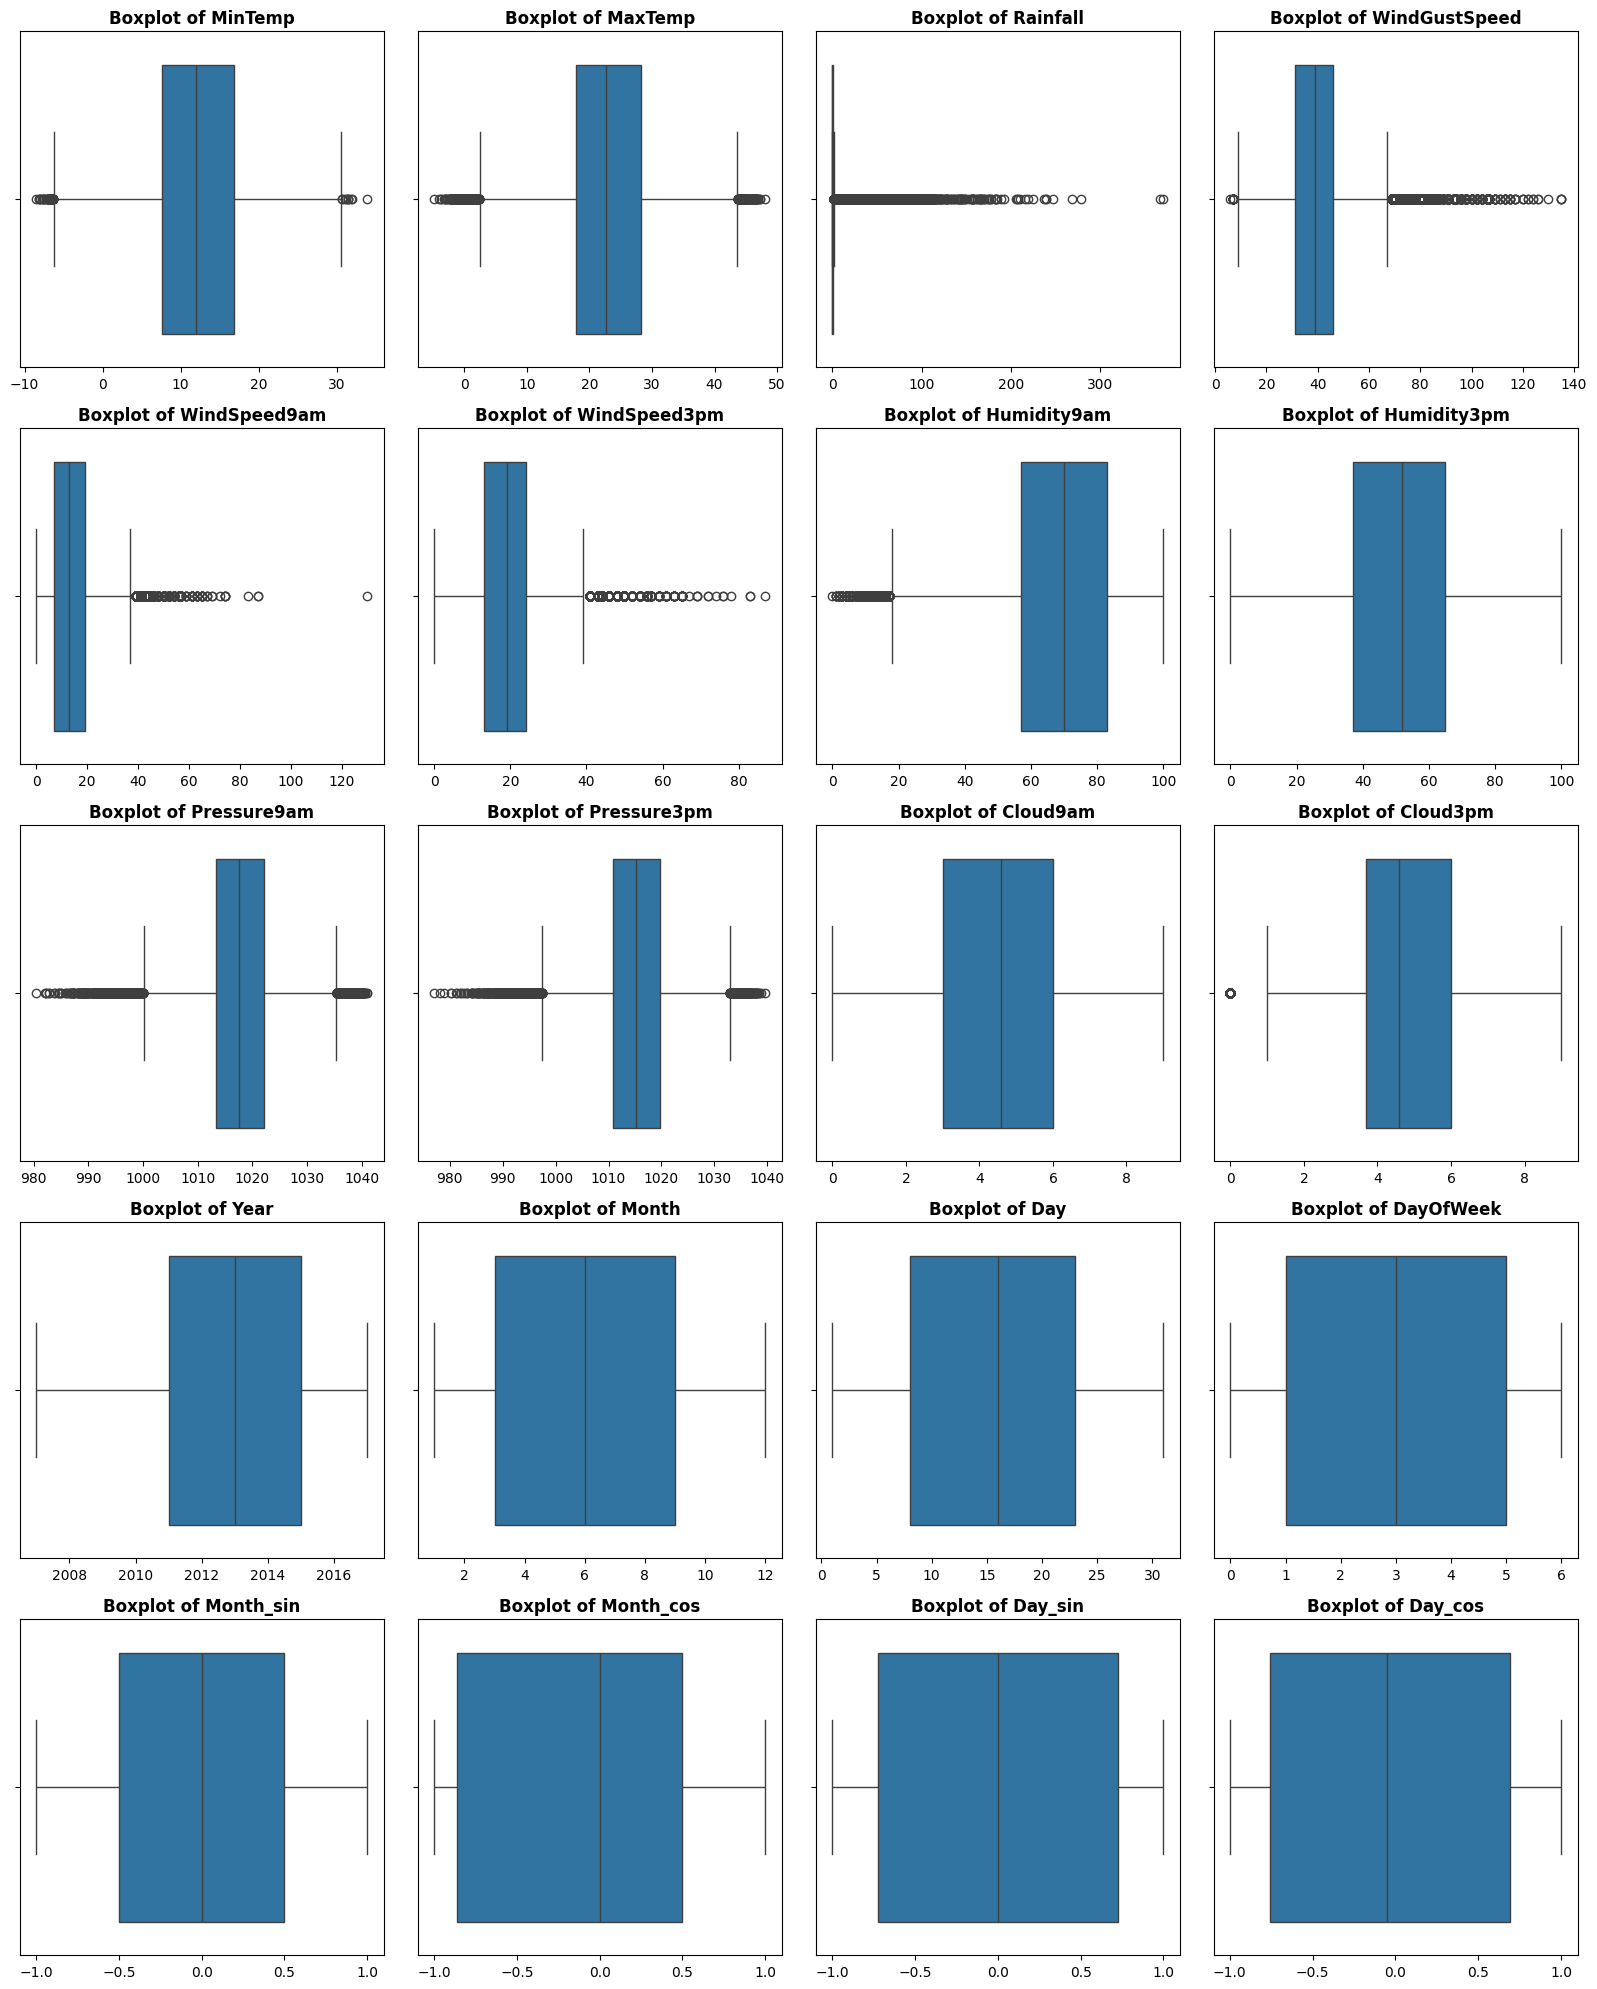

In [63]:
plot_boxplots(df)

In [64]:
def remove_outliers_iqr(df):
    print("Old Shape:", df.shape)
    numerical_cols_current = list(df.select_dtypes(include=np.number).columns)
    for col in numerical_cols_current:
        # Use nanpercentile to handle NaN values correctly
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 2 * IQR
        upper_bound = Q3 + 2 * IQR

        # Create a boolean mask to filter outliers (keeps NaN values)
        mask = (df[col] >= lower_bound) & (df[col] <= upper_bound) | df[col].isna()
        df = df[mask]
        
    print("New Shape:", df.shape)
    return df

df = remove_outliers_iqr(df)

Old Shape: (142193, 26)
New Shape: (116111, 26)


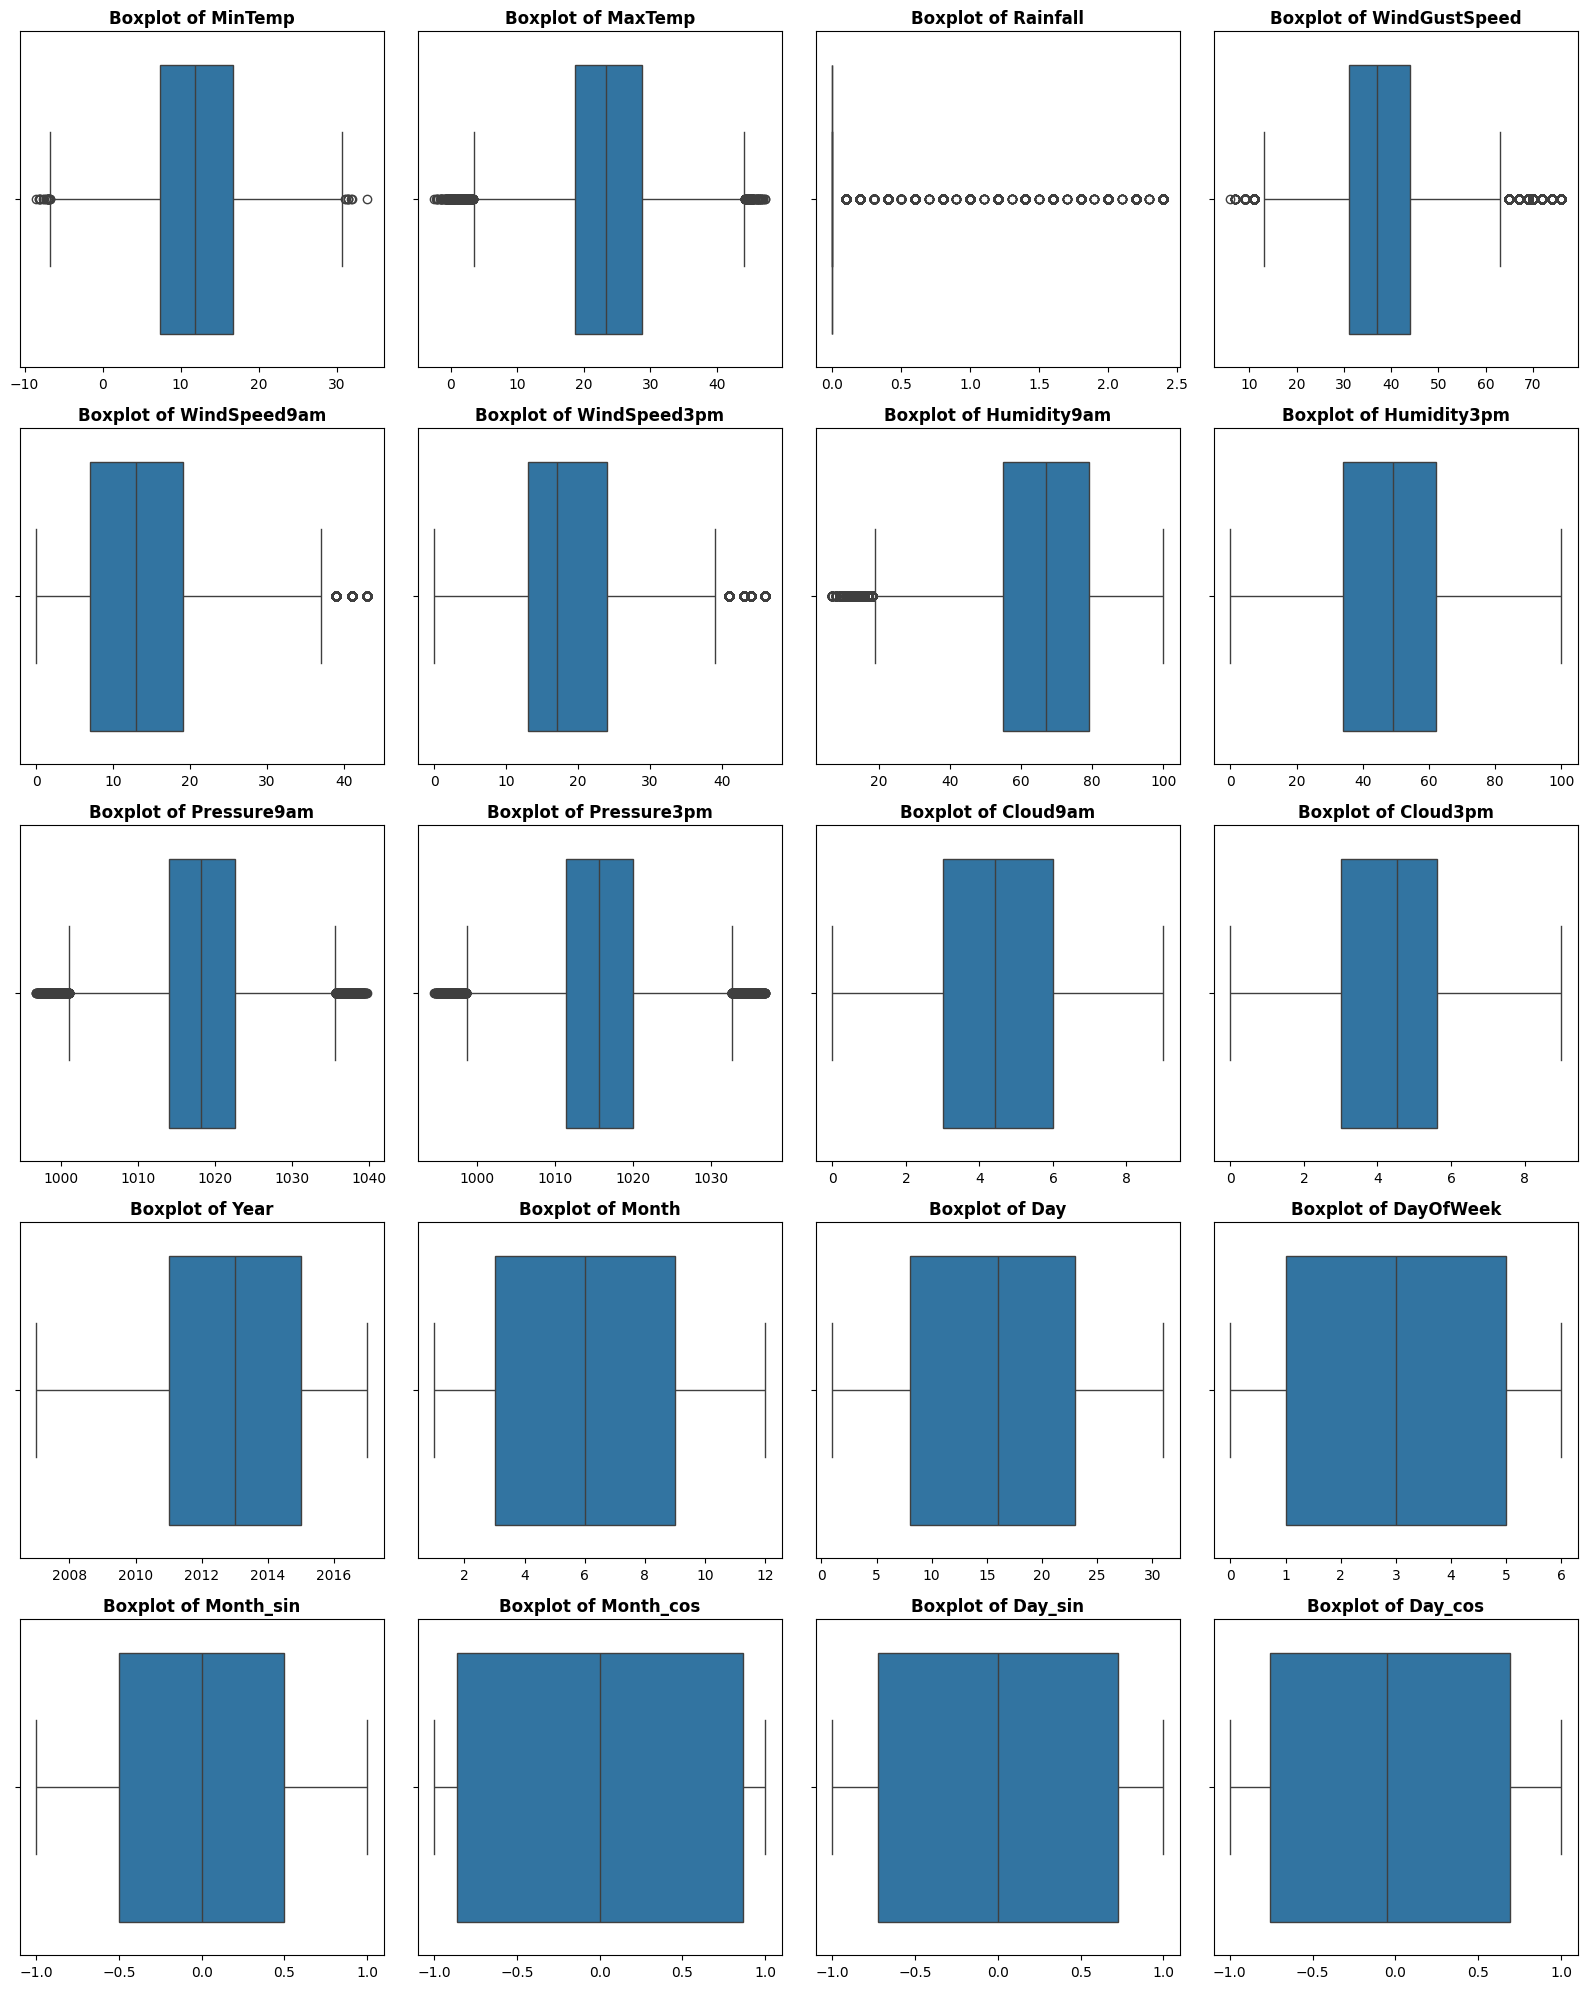

In [65]:
plot_boxplots(df)

### 9- Data-Target Split
***

In [66]:
X = df.drop(columns=[target_col])
y = df[target_col]

### 10- Build Preprocessing Pipeline
***

In [67]:
print(y[5:10])

5      No
6      No
7      No
9      No
10    Yes
Name: RainTomorrow, dtype: object


In [68]:
le_target = LabelEncoder()
y = le_target.fit_transform(y)

In [69]:
print(y[5:10]) # type: ignore

[0 0 0 0 1]


In [70]:
numerical_cols = list(X.select_dtypes(include=np.number).columns)
categorical_cols = list(X.select_dtypes(include='object').columns)

In [71]:
categorical_binary_cols = [col for col in categorical_cols if X[col].nunique() == 2]
categorical_multi_class_cols = [col for col in categorical_cols if X[col].nunique() > 2]

print(f"Numerical columns ({len(numerical_cols)}): {numerical_cols}")
print(f"Binary categorical ({len(categorical_binary_cols)}): {categorical_binary_cols}", )
print(f"Multi-class categorical ({len(categorical_multi_class_cols)}): {categorical_multi_class_cols}")

Numerical columns (20): ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Year', 'Month', 'Day', 'DayOfWeek', 'Month_sin', 'Month_cos', 'Day_sin', 'Day_cos']
Binary categorical (1): ['RainToday']
Multi-class categorical (4): ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']


In [72]:
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder())
])

multiclass_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('Numerical Preprocessing', numerical_transformer, numerical_cols),
    ('Categorical Binary Preprocessing', binary_transformer, categorical_binary_cols),
    ('Categorical Multi-Class Preprocessing', multiclass_transformer, categorical_multi_class_cols)
])

### 11- Train-Test Split
***

In [73]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Train Records:",X_train.shape[0])
print("Test Records:",X_test.shape[0])

Train Records: 92888
Test Records: 23223


In [74]:
# display the unprocessed training data
X_train_df = pd.DataFrame(X_train, columns=X.columns)
print(X_train_df.shape)
X_train_df.head()

X_test_df = pd.DataFrame(X_test, columns=X.columns)
print(X_test_df.shape)
X_train_df.head()

(92888, 25)
(23223, 25)


,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday,Year,Month,Day,DayOfWeek,Month_sin,Month_cos,Day_sin,Day_cos
21604,NorfolkIsland,17.0,22.9,0.0,SSE,33.0,SSE,SE,17.0,19.0,71.0,78.0,1021.7,1020.5,3.000000,7.000000,No,2010,5,1,5,0.500000,-8.660254e-01,0.201299,0.979530
60146,Bendigo,4.1,15.1,0.0,SW,31.0,WSW,SE,20.0,11.0,89.0,80.0,1027.0,1024.9,8.000000,8.000000,No,2014,8,25,0,-0.866025,-5.000000e-01,-0.937752,0.347305
27625,Richmond,14.8,21.7,0.2,ESE,31.0,SSE,SE,17.0,24.0,66.0,60.0,1023.3,1020.0,4.432692,4.861141,No,2010,4,4,6,0.866025,-5.000000e-01,0.724793,0.688967
65135,MelbourneAirport,8.1,20.3,0.0,N,54.0,NE,N,15.0,31.0,77.0,38.0,1027.4,1024.0,1.000000,1.000000,No,2011,9,2,4,-1.000000,-1.836970e-16,0.394356,0.918958
97578,Adelaide,15.7,22.1,1.2,SW,39.0,SW,SW,17.0,19.0,66.0,40.0,1017.5,1016.3,4.442467,4.479604,Yes,2012,1,10,1,0.500000,8.660254e-01,0.897805,-0.440394


##### Visulize Pipeline results

In [75]:
# model will not use this (just for demonstration)
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test) 

In [76]:
X_train_processed_df = pd.DataFrame(X_train_processed, columns=preprocessor.get_feature_names_out()) #type:ignore
print(X_train_processed_df.shape)
X_test_processed_df = pd.DataFrame(X_test_processed, columns=preprocessor.get_feature_names_out()) #type:ignore
print(X_test_processed_df.shape)
X_train_processed_df.head()

(92888, 114)
(23223, 114)


,Numerical Preprocessing__MinTemp,Numerical Preprocessing__MaxTemp,Numerical Preprocessing__Rainfall,Numerical Preprocessing__WindGustSpeed,Numerical Preprocessing__WindSpeed9am,Numerical Preprocessing__WindSpeed3pm,Numerical Preprocessing__Humidity9am,Numerical Preprocessing__Humidity3pm,Numerical Preprocessing__Pressure9am,Numerical Preprocessing__Pressure3pm,Numerical Preprocessing__Cloud9am,Numerical Preprocessing__Cloud3pm,Numerical Preprocessing__Year,Numerical Preprocessing__Month,Numerical Preprocessing__Day,Numerical Preprocessing__DayOfWeek,Numerical Preprocessing__Month_sin,Numerical Preprocessing__Month_cos,Numerical Preprocessing__Day_sin,Numerical Preprocessing__Day_cos,Categorical Binary Preprocessing__RainToday,Categorical Multi-Class Preprocessing__Location_Albany,Categorical Multi-Class Preprocessing__Location_Albury,Categorical Multi-Class Preprocessing__Location_AliceSprings,Categorical Multi-Class Preprocessing__Location_BadgerysCreek,Categorical Multi-Class Preprocessing__Location_Ballarat,Categorical Multi-Class Preprocessing__Location_Bendigo,Categorical Multi-Class Preprocessing__Location_Brisbane,Categorical Multi-Class Preprocessing__Location_Cairns,Categorical Multi-Class Preprocessing__Location_Canberra,Categorical Multi-Class Preprocessing__Location_Cobar,Categorical Multi-Class Preprocessing__Location_CoffsHarbour,Categorical Multi-Class Preprocessing__Location_Dartmoor,Categorical Multi-Class Preprocessing__Location_Darwin,Categorical Multi-Class Preprocessing__Location_GoldCoast,Categorical Multi-Class Preprocessing__Location_Hobart,Categorical Multi-Class Preprocessing__Location_Katherine,Categorical Multi-Class Preprocessing__Location_Launceston,Categorical Multi-Class Preprocessing__Location_Melbourne,Categorical Multi-Class Preprocessing__Location_MelbourneAirport,Categorical Multi-Class Preprocessing__Location_Mildura,Categorical Multi-Class Preprocessing__Location_Moree,Categorical Multi-Class Preprocessing__Location_MountGambier,Categorical Multi-Class Preprocessing__Location_MountGinini,Categorical Multi-Class Preprocessing__Location_Newcastle,Categorical Multi-Class Preprocessing__Location_Nhil,Categorical Multi-Class Preprocessing__Location_NorahHead,Categorical Multi-Class Preprocessing__Location_NorfolkIsland,Categorical Multi-Class Preprocessing__Location_Nuriootpa,Categorical Multi-Class Preprocessing__Location_PearceRAAF,Categorical Multi-Class Preprocessing__Location_Penrith,Categorical Multi-Class Preprocessing__Location_Perth,Categorical Multi-Class Preprocessing__Location_PerthAirport,Categorical Multi-Class Preprocessing__Location_Portland,Categorical Multi-Class Preprocessing__Location_Richmond,Categorical Multi-Class Preprocessing__Location_Sale,Categorical Multi-Class Preprocessing__Location_SalmonGums,Categorical Multi-Class Preprocessing__Location_Sydney,Categorical Multi-Class Preprocessing__Location_SydneyAirport,Categorical Multi-Class Preprocessing__Location_Townsville,Categorical Multi-Class Preprocessing__Location_Tuggeranong,Categorical Multi-Class Preprocessing__Location_Uluru,Categorical Multi-Class Preprocessing__Location_WaggaWagga,Categorical Multi-Class Preprocessing__Location_Walpole,Categorical Multi-Class Preprocessing__Location_Watsonia,Categorical Multi-Class Preprocessing__Location_Williamtown,Categorical Multi-Class Preprocessing__Location_Witchcliffe,Categorical Multi-Class Preprocessing__Location_Wollongong,Categorical Multi-Class Preprocessing__Location_Woomera,Categorical Multi-Class Preprocessing__WindGustDir_ENE,Categorical Multi-Class Preprocessing__WindGustDir_ESE,Categorical Multi-Class Preprocessing__WindGustDir_N,Categorical Multi-Class Preprocessing__WindGustDir_NE,Categorical Multi-Class Preprocessing__WindGustDir_NNE,Categorical Multi-Class Preprocessing__WindGustDir_NNW,Categorical Multi-Class Preprocessing__WindGustDir_NW,Categorical Multi-Class Preprocessing__WindGustDir_S,Categorical Multi-Class Preprocessing__WindGustDir_SE,Categor

### 12- Build Model Pipeline with GridSearch
***

In [77]:
pca = PCA(n_components=0.95)  # Retain 95% variance

rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', pca),
    ('classifier', RandomForestClassifier(random_state=42, n_jobs=8))
])

param_grid = {
    'classifier__n_estimators': [200],
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    rf_pipeline,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=1,  # Set to 1 to avoid pickling issues
    verbose=3
)

rf_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('Numerical Preprocessing',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['MinTemp', 'MaxTemp',
                                                   'Rainfall', 'WindGustSpeed',
                                                   'WindSpeed9am',
                                                   'WindSpeed3pm',
                                                   'Humidity9am', 'Humidity3pm',
                                                   'Pressure9am', 'Pressure3pm',
                                                   'Cloud9am', 'Cloud3pm',
                                                   'Year', 'Month', 'Day',
                                                   'DayOfWeek', 'Month_sin',
                                                   'Month_cos', '...
                                                  ['RainToday']),
                                                 ('Categorical Multi-Class '
                                                  'Preprocessing',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Location', 'WindGustDir',
                                                   'WindDir9am',
                                                   'WindDir3pm'])])),
                ('pca', PCA(n_components=0.95)),
                ('classifier',
                 RandomForestClassifier(n_jobs=8, random_state=42))])

In [78]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=200;, score=0.861 total time=  29.4s
[CV 2/5] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=200;, score=0.860 total time=  25.5s
[CV 3/5] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=200;, score=0.857 total time=  28.5s
[CV 4/5] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=200;, score=0.858 total time=  30.8s
[CV 5/5] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=200;, score=0.859 total time=  27.9s
[CV 1/5] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=5, class

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('Numerical '
                                                                         'Preprocessing',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['MinTemp',
                                                                          'MaxTemp',
                                                                          'Rainfall',
                                                                          'WindGustSpeed',
                                                                          'WindSpeed9am',
                                                                          'WindSpeed3pm',
                                                                          'Humidity9am',
                                                                          'Humidity3pm',
                                                                          'Pressure9am',
                                                                          'Pressure3pm',
                                                                          'Cloud9am',
                                                                          'Cloud3pm',
                                                                          'Year',
                                                                          'Month',
                                                                          'Day',
                                                                          'DayOfW...
                                                                         ['Location',
                                                                          'WindGustDir',
                                                                          'WindDir9am',
                                                                          'WindDir3pm'])])),
                                       ('pca', PCA(n_components=0.95)),
                                       ('classifier',
                                        RandomForestClassifier(n_jobs=8,
                                                               random_state=42))]),
             n_jobs=1,
             param_grid={'classifier__max_depth': [10, 20, None],
                         'classifier__min_samples_leaf': [1, 2],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [200]},
             scoring='accuracy', verbose=3)

### 10- Model Evaluation
***

In [79]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [80]:
print("Test Accuracy:")
print(accuracy_score(y_test, y_pred))

Test Accuracy:
0.8695259010463764


In [81]:
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le_target.classes_))

Classification Report:
              precision    recall  f1-score   support

          No       0.88      0.98      0.93     19493
         Yes       0.76      0.27      0.40      3730

    accuracy                           0.87     23223
   macro avg       0.82      0.63      0.66     23223
weighted avg       0.86      0.87      0.84     23223



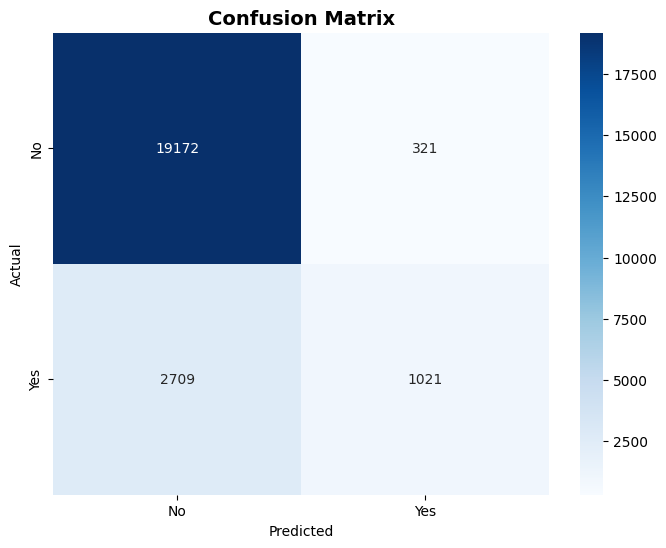

In [82]:
def plot_confusion_matrix():
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=le_target.classes_, yticklabels=le_target.classes_) #type:ignore
    plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

plot_confusion_matrix()